In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import datetime

In [3]:
unif = np.random.default_rng().uniform
normal = np.random.default_rng().normal

In [76]:
def h_pdf(x):
    return stats.beta(2,5).pdf(x)

def g_pdf(x):
    return 2.5 * stats.uniform.pdf(x)

def uniform_AR_n(n, g, M):
    arr = np.zeros((n,2))
    for i in range(0,n):
        Flag = True
        k = 0
        while Flag:
            X = g()
            U = unif()
            if U < h_pdf(X) / (M * g_pdf(X)):
                Flag = False
            k += 1
        arr[i,:] = (X, k)
    return arr

def Algo3(g, M):
    X = g()
    U = unif()
    if U < h_pdf(X) / (M * g_pdf(X)):
        return (X, 0)
    else:
        Y, k = Algo3(g, M)
        return (Y, k+1)

def Algo3_n(n, g, M):
    arr = np.zeros((n,2))
    for i in range(0,n):
        X, k = Algo3(g, M)
        arr[i,:] = (X, k)
    return arr

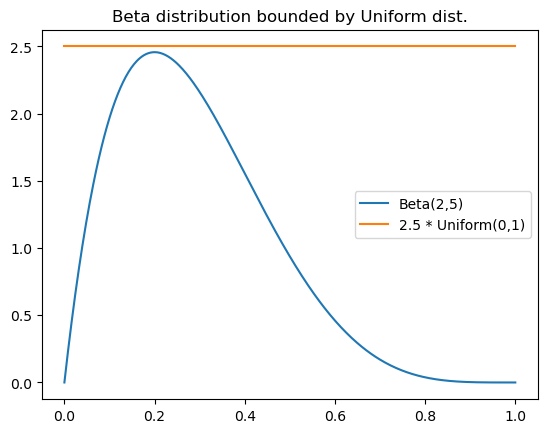

In [26]:
x = np.linspace(0,1,500)
y = h(x)
z = g(x)

fig, axes = plt.subplots()

axes.plot(x, y, label = "Beta(2,5)")
axes.plot(x, z, label = "2.5 * Uniform(0,1)")
axes.legend()
plt.title("Beta distribution bounded by Uniform dist.")
plt.show()

In [78]:
n = 10000
g = unif
M = 2.5

start_AR = datetime.datetime.now()
array_AR = uniform_AR_n(n, g, M)
end_AR = datetime.datetime.now()

start_Algo3 = datetime.datetime.now()
array_Algo3 = Algo3_n(n, g, M)
end_Algo3 = datetime.datetime.now()

In [86]:
array_AR[0,:]

array([0.30771247, 4.        ])

In [84]:
print(f"tiempo de simulación Aceptación Rechazo: {(end_AR-start_AR)}")
print(f"tiempo de simulación Algoritmo 3: {(end_Algo3-start_Algo3)}")

tiempo de simulación Aceptación Rechazo: 0:00:34.071779
tiempo de simulación Algoritmo 3: 0:00:34.883036


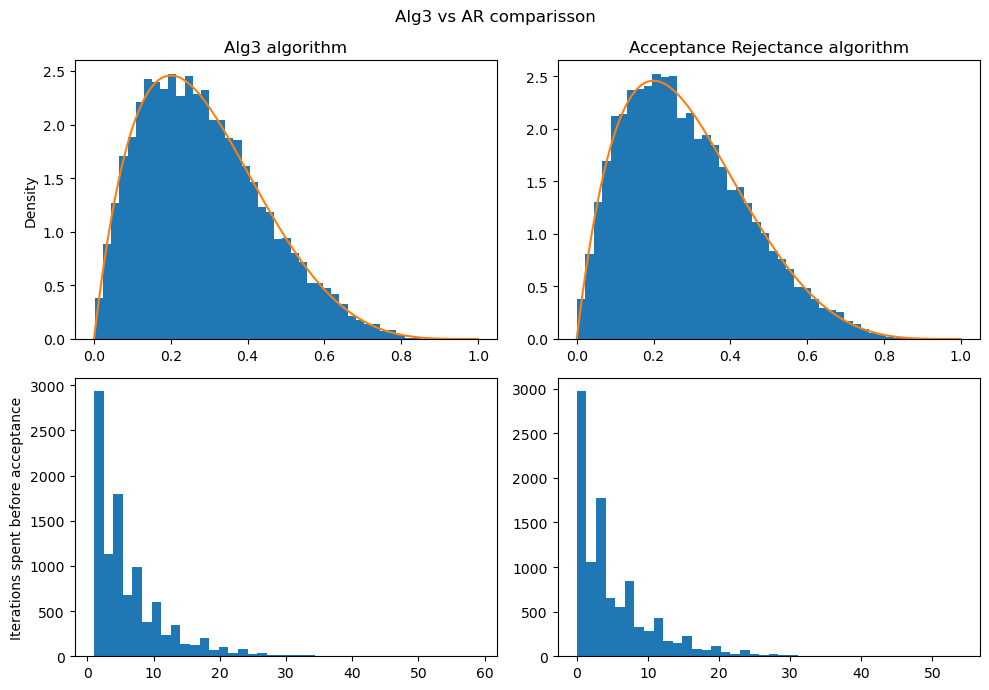

In [117]:
fig, axes = plt.subplots(2,2, figsize=(10,7))

axes[0,0].hist(array_AR[:,0],bins=40, density=True)
axes[0,0].plot(x, y, label = "Beta(2,5)")
axes[0,0].set_ylabel("Density")
axes[0,0].set_title("Alg3 algorithm")

axes[1,0].hist(array_AR[:,1],bins=40)

axes[1,0].set_ylabel("Iterations spent before acceptance")

axes[0,1].hist(array_Algo3[:,0],bins=40, density=True)
axes[0,1].plot(x, y, label = "Beta(2,5)")
axes[0,1].set_title("Acceptance Rejectance algorithm")

axes[1,1].hist(array_Algo3[:,1],bins=40)

plt.suptitle("Alg3 vs AR comparisson")
plt.tight_layout()
plt.show()